In [46]:
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt
import time

1. На вход передатчика сигнала подается сигнал косинуса с частотами 50 и 150 Гц.
(a) Постройте дискретный спектр сигнала с помощью стандартной функции быстрого преобразования Фурье fft() и функции DFT_slow(). Сравните время вычисления этих двух функций.

In [47]:
def cosinus(x, frequency=50, amplitude=2):
    w = 2 * np.pi * frequency
    return amplitude * np.cos(w * x)


def DFT_slow(x):
    """Compute the discrete Fourier Transform of the 1D array x"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

In [48]:
N = 500  # Количество отсчетов
fmax = 1000  # максимальная частота
T = 1.0 / fmax  # период
# f = 100  # частота сигнала в Гц
x = np.linspace(0, N * T, N)
y = cosinus(x) + cosinus(x, 150)  # сигнал косинуса с частотами 50 и 150 гц

DFT: 0.024034976959228516 sec
fft: 0.0 sec


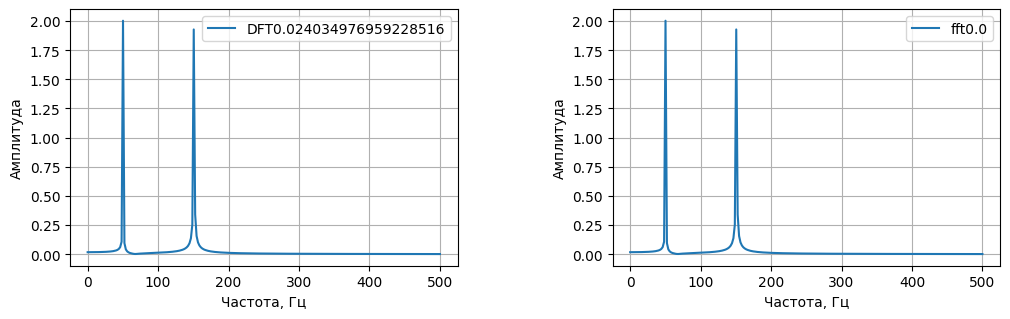

In [49]:
# DFT_slow
start_time_DFT = time.time()
yf = DFT_slow(y)
# %timeit DFT_slow(x)
end_time_DFT = time.time()
xf = np.linspace(0.0, fmax / 2, N // 2)
fig = plt.figure(figsize=(12, 8))  # размер полотна
plt.subplots_adjust(wspace=0.4, hspace=0.4)  # отступ между графиками
plt.subplot(221)
plt.plot(xf, 2.0 / N * np.abs(yf[0:N // 2]), label='DFT' + str(end_time_DFT - start_time_DFT))
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')
plt.legend()
print('DFT:', end_time_DFT - start_time_DFT, 'sec')


# fft
start_time_fft = time.time()
yff = fft(y)
# %timeit fft(y)
end_time_fft = time.time()
freq = np.fft.rfftfreq(N, 0.0001)
plt.subplot(222)
plt.plot(xf, 2.0 / N * np.abs(yff[0:N // 2]), label='fft' + str(end_time_fft - start_time_fft))
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')
plt.legend()
print('fft:', end_time_fft - start_time_fft, 'sec')

(б) С помощью функции быстрого обратного преобразования Фурье ifft() убедитесь, что форма сигнала не изменилась.

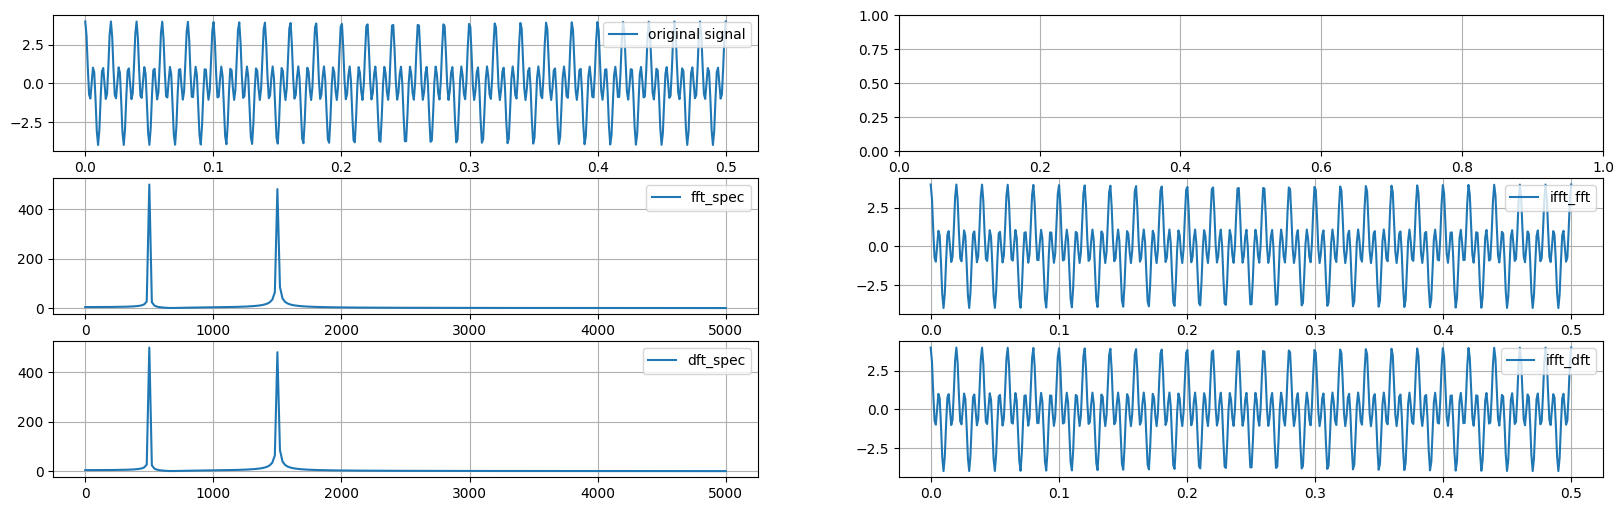

In [50]:
# ifft
ift = np.fft.ifft(yf)
idt = np.fft.ifft(yff)

_, ax = plt.subplots(3, 2, figsize=(20, 6))
ax[0][0].plot(x, y, label="original signal")
ax[0][0].legend()
ax[1][0].plot(freq, np.abs(yf[0:N // 2 + 1]), label="fft_spec")
ax[1][0].legend()
ax[2][0].plot(freq, np.abs(yff[0:N // 2 + 1]), label="dft_spec")
ax[2][0].legend()
ax[1][1].plot(x, ift, label="ifft_fft")
ax[1][1].legend()
ax[2][1].plot(x, idt, label="ifft_dft")
ax[2][1].legend()
for a in ax.flat:  # сетка
    a.grid(True)
plt.show()

(в) После распространения сигнала в линии на приемнике был получен сигнал, искаженный белым шумом. Постройте дискретный спектр зашумленного сигнала на приемнике.
Возьмите обратное преобразование Фурье и посмотрите, как поменялась форма принятого сигнала после распространения в линии.

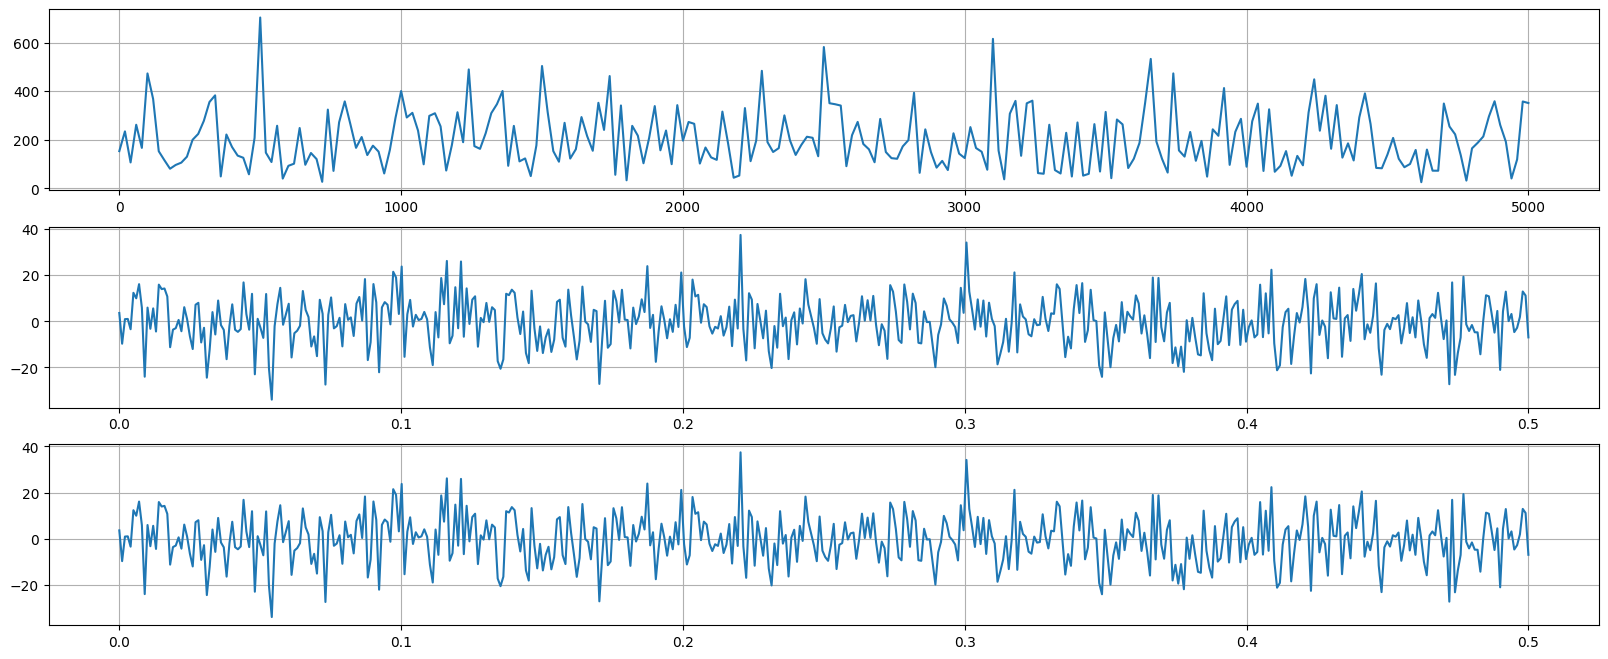

In [51]:
noise = np.random.normal(0, 1, N)
noised_y = y + 2*noise  # сигнал, искаженный шумом
noised_fft = np.fft.rfft(noised_y)  # прямое преобразование Фурье
yn = np.fft.irfft(noised_fft)  # обратное преобразование Фурье
_, ax = plt.subplots(3, 1, figsize=(20, 8))
ax[0].plot(freq, np.abs(noised_fft), label="spec")
ax[1].plot(x, yn, label="signal_ifft")
ax[2].plot(x, noised_y, label="signal")
for a in ax.flat:  # сетка
    a.grid(True)
plt.show()

2. Исследуемый сигнал x(t) описывается периодическими прямоугольными импульсами с амплитудой A=2, периодом T=2 на интервале времени от 0 до 4. Постройте дискретный спектр сигнала с помощью стандартной функции быстрого преобразования Фурье fft() и функции DFT_slow(). Наложите шум на данный сигнал, посмотрите спектр зашумленного сигнала.

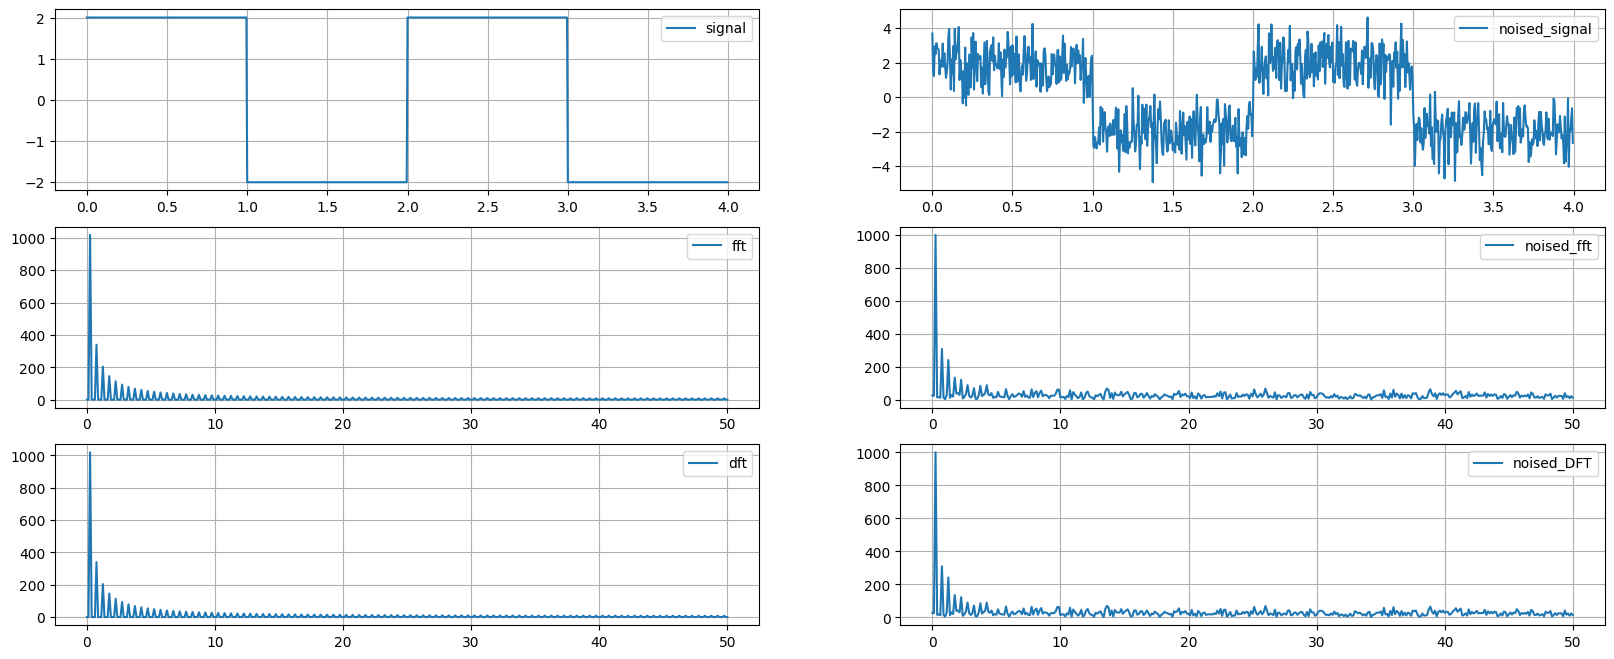

In [31]:
def multiple_square_impuls_func(x, amplitude=2):
    return amplitude if 0 <= x % 2 < 1 else -amplitude


N = 800
x = np.linspace(0, 4, N, endpoint=False)
y = np.array([multiple_square_impuls_func(t) for t in x])

frequencies = np.fft.rfftfreq(N, 0.01)
fft = np.fft.rfft(y)
dft = DFT_slow(y)

noise = np.random.normal(0, 1, N)
noised_y = y + noise
noised_fft = np.fft.rfft(noised_y)
noised_DFT = DFT_slow(noised_y)

_, ax = plt.subplots(3, 2, figsize=(20, 8))
ax[0][0].plot(x, y, label="signal")
ax[0][0].legend()
ax[1][0].plot(frequencies, np.abs(fft), label="fft")
ax[1][0].legend()
ax[2][0].plot(frequencies, np.abs(dft[0:N // 2 + 1]), label="dft")
ax[2][0].legend()

ax[0][1].plot(x, noised_y, label="noised_signal")
ax[0][1].legend()
ax[1][1].plot(frequencies, np.abs(noised_fft), label="noised_fft")
ax[1][1].legend()
ax[2][1].plot(frequencies, np.abs(noised_DFT[0:N // 2 + 1]), label="noised_DFT")
ax[2][1].legend()
for a in ax.flat:  # сетка
    a.grid(True)
plt.show()

3. Реализовать код для определения быстрого дискретного преобразования Фурье (БДПФ). Убедиться, что функция написана верно, для этого рассмотреть сигнал косинуса с
частотой 50 Гц и убедиться, что сигнал имеет одну выделенную частоту 50 Гц. Сравните время выполнения написанного кода для реализации (БДПФ) с встроенной функцией (БДПФ) fft().

fft:  0.0 
my_dft:  0.009957313537597656


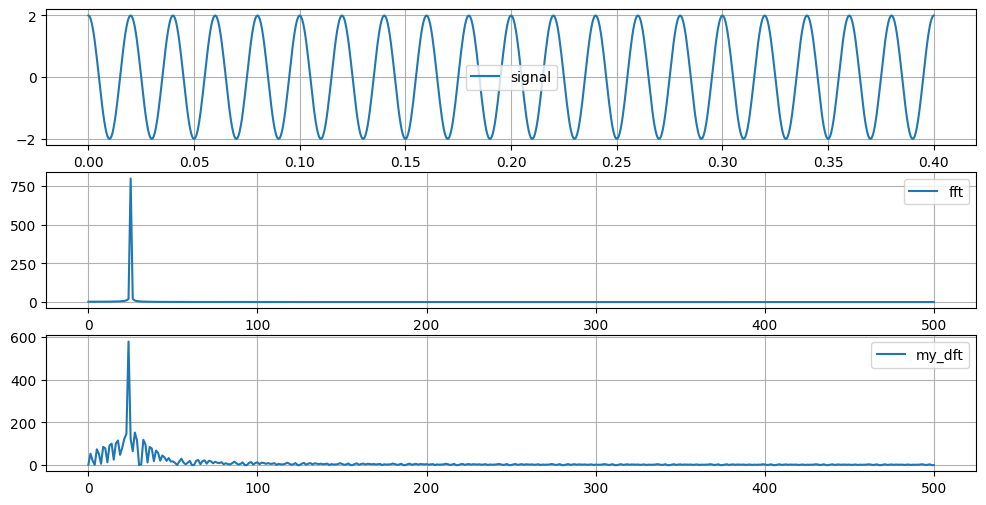

In [32]:
def bdft(x):
    N = len(x)
    if N <= 1:
        return x
    
    # разделение массива на две половины
    even = x[::2]
    odd = x[1::2]
    
    X0 = bdft(even)
    X1 = bdft(odd)
    
    WN = np.exp(-2j * np.pi / N)
    
    X = np.zeros(N, dtype=complex)
    for k in range(N // 2):
        X[k] = X0[k] + WN ** k * X1[k]
        X[N // 2 + k] = X0[k] - WN ** k * X1[k]
    return X

x = np.linspace(0, 0.4, N)
y = cosinus(x)

# fft
frequencies = np.fft.rfftfreq(N, 0.001)
start_time_fft = time.time()
fft = np.fft.fft(y)
end_time_fft = time.time()

# fft
start_time_my_fft = time.time()
fdft = bdft(y)
# fdft = compute_fft(y, N)
end_time_my_fft = time.time()
print("fft: ", end_time_fft - start_time_fft, "\nmy_dft: ", end_time_my_fft - start_time_my_fft)

_, ax = plt.subplots(3, 1, figsize=(12, 6))
ax[0].plot(x, y, label="signal")
ax[0].legend()
ax[1].plot(frequencies, np.abs(fft[0:N // 2 + 1]), label="fft")
ax[1].legend()
ax[2].plot(frequencies, np.abs(fdft[0:N // 2 + 1]), label="my_DFT")

ax[2].legend()
for a in ax.flat:  # сетка
    a.grid(True)
plt.show()